In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
churn=pd.read_csv('customer_churn.csv')
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [5]:
customers = churn[['SeniorCitizen','tenure','MonthlyCharges','Churn']]

In [6]:
customers

SeniorCitizen  tenure  MonthlyCharges Churn
0                 0       1           29.85    No
1                 0      34           56.95    No
2                 0       2           53.85   Yes
3                 0      45           42.30    No
4                 0       2           70.70   Yes
...             ...     ...             ...   ...
7038              0      24           84.80    No
7039              0      72          103.20    No
7040              0      11           29.60    No
7041              1       4           74.40   Yes
7042              0      66          105.65    No

[7043 rows x 4 columns]

In [7]:
customers.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

In [8]:
cols= [] 
for c in customers.columns:
    cols.append(c.lower())
customers.columns = cols

In [9]:
def cleaning(x):
    if x == 'Yes':
        return 1
    else:
        return 0
    
customers['churn'] = list(map(cleaning,customers['churn']))

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_56314/120261891.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['churn'] = list(map(cleaning,customers['churn']))


In [10]:
customers

seniorcitizen  tenure  monthlycharges  churn
0                 0       1           29.85      0
1                 0      34           56.95      0
2                 0       2           53.85      1
3                 0      45           42.30      0
4                 0       2           70.70      1
...             ...     ...             ...    ...
7038              0      24           84.80      0
7039              0      72          103.20      0
7040              0      11           29.60      0
7041              1       4           74.40      1
7042              0      66          105.65      0

[7043 rows x 4 columns]

In [11]:
X = customers.drop(['churn'], axis=1)
y = customers['churn']

<Axes: >

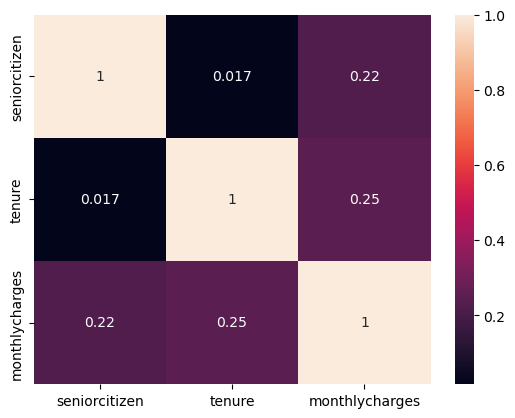

In [12]:
correl = X.corr()
sns.heatmap(correl, annot = True)

<Axes: >

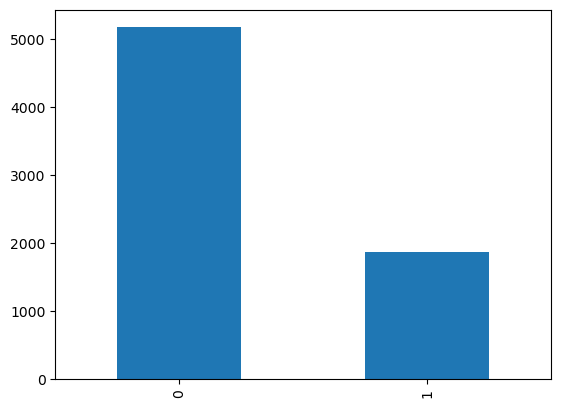

In [15]:
X_balance = pd.value_counts(customers['churn'])
X_balance.plot(kind='bar')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
transformer = MinMaxScaler().fit(X_train) 
X_train_normalized = transformer.transform(X_train)
X_train_std = pd.DataFrame(X_train_normalized, columns=X.columns)


In [20]:
X_test_normalized = transformer.transform(X_test)
X_test_std = pd.DataFrame(X_test_normalized, columns=X.columns)

In [21]:
X_train_std

seniorcitizen    tenure  monthlycharges
0               0.0  0.291667        0.464375
1               0.0  0.750000        0.786746
2               0.0  0.013889        0.051819
3               0.0  0.055556        0.517688
4               0.0  0.000000        0.434978
...             ...       ...             ...
5629            0.0  0.013889        0.764823
5630            0.0  0.319444        0.725959
5631            0.0  0.166667        0.028899
5632            1.0  0.166667        0.809168
5633            0.0  0.361111        0.015446

[5634 rows x 3 columns]

In [22]:
X_test_std 

seniorcitizen    tenure  monthlycharges
0               0.0  0.013889        0.065272
1               0.0  0.569444        0.069756
2               0.0  0.722222        0.010962
3               0.0  0.013889        0.578974
4               0.0  0.930556        0.321873
...             ...       ...             ...
1404            0.0  0.888889        0.498754
1405            0.0  0.708333        0.914798
1406            0.0  0.236111        0.016442
1407            0.0  0.958333        0.256104
1408            0.0  0.013889        0.130543

[1409 rows x 3 columns]

In [23]:
classification = LogisticRegression (random_state = 42, solver = 'lbfgs').fit(X_train_std,y_train)

In [25]:
classification.score(X_test_std,y_test)

0.8041163946061036

In [27]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [28]:
predictions = classification.predict(X_test_std)

In [30]:
print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))

precision:  0.6932270916334662
recall:  0.46648793565683644
f1:  0.5576923076923076


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions) ##not so good 

array([[959,  77],
       [199, 174]])

In [32]:
sm= SMOTE(random_state=42,k_neighbors=3)

In [33]:
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_std,y_train)

In [34]:
SMOTEDCLASS = LogisticRegression (random_state = 42, solver = 'lbfgs').fit(X_train_SMOTE,y_train_SMOTE)

In [35]:
SMOTEDCLASS.score(X_test_std,y_test)

0.7437899219304471

In [39]:
predictions_sm = SMOTEDCLASS.predict(X_test_std)

In [40]:
print("precision: ",precision_score(y_test,predictions_sm))
print("recall: ",recall_score(y_test,predictions_sm))
print("f1: ",f1_score(y_test,predictions_sm))

precision:  0.5107913669064749
recall:  0.7613941018766756
f1:  0.6114101184068891


In [41]:
predictions_sm

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
confusion_matrix(y_test,predictions_sm)

array([[764, 272],
       [ 89, 284]])